# Redo all the fitting using physical constraints

In [1]:
%run -i startup2.py

## Load the data

In [2]:
file_info = pd.read_csv("data_info.csv", index_col=0)
file_info

,iq,sq,fq,gr,fgr0,fgr1,fgr2,csv0,csv1,csv2,...,csv_two_phase,fgr_two_phase,csv_two_phase_sine_wave,fgr_two_phase_sine_wave,csv_one_phase_logsp,fgr_one_phase_logsp,csv_two_phase_logsp,fgr_two_phase_logsp,final_csv,final_fgr
sample,,,,,,,,,,,,,,,,,,,,,
JBNP31,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,res/JBNP31_fix_xyz_0.fgr,res/JBNP31_free_xyz_0.fgr,res/JBNP31_free_xyz_add_delta_0.fgr,res/JBNP31_fix_xyz_0.csv,res/JBNP31_free_xyz_0.csv,res/JBNP31_free_xyz_add_delta_0.csv,...,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr,NaN,NaN,res/JBNP31_one_phase_logsp_0.csv,res/JBNP31_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr
JBNP32L,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,res/JBNP32L_fix_xyz_0.fgr,res/JBNP32L_free_xyz_2.fgr,res/JBNP32L_free_xyz_add_delta_1.fgr,res/JBNP32L_fix_xyz_0.csv,res/JBNP32L_free_xyz_2.csv,res/JBNP32L_free_xyz_add_delta_1.csv,...,NaN,NaN,res/JBNP32L_two_phase_sine_wave_0.csv,res/JBNP32L_two_phase_sine_wave_0.fgr,res/JBNP32L_one_phase_logsp_0.csv,res/JBNP32L_one_phase_logsp_0.fgr,res/JBNP32L_two_phase_logsp_0.csv,res/JBNP32L_two_phase_logsp_0.fgr,res/JBNP32L_add_sine_wave_0.csv,res/JBNP32L_add_sine_wave_0.fgr
JBNP32,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,res/JBNP32_fix_xyz_0.fgr,res/JBNP32_free_xyz_0.fgr,res/JBNP32_free_xyz_add_delta_0.fgr,res/JBNP32_fix_xyz_0.csv,res/JBNP32_free_xyz_0.csv,res/JBNP32_free_xyz_add_delta_0.csv,...,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr,NaN,NaN,res/JBNP32_one_phase_logsp_0.csv,res/JBNP32_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr
JBNP33L,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,res/JBNP33L_fix_xyz_0.fgr,res/JBNP33L_free_xyz_0.fgr,res/JBNP33L_free_xyz_add_delta_0.fgr,res/JBNP33L_fix_xyz_0.csv,res/JBNP33L_free_xyz_0.csv,res/JBNP33L_free_xyz_add_delta_0.csv,...,NaN,NaN,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr,res/JBNP33L_one_phase_logsp_1.csv,res/JBNP33L_one_phase_logsp_1.fgr,res/JBNP33L_two_phase_logsp_0.csv,res/JBNP33L_two_phase_logsp_0.fgr,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr
JBNP33,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,res/JBNP33_fix_xyz_0.fgr,res/JBNP33_free_xyz_0.fgr,res/JBNP33_free_xyz_add_delta_0.fgr,res/JBNP33_fix_xyz_0.csv,res/JBNP33_free_xyz_0.csv,res/JBNP33_free_xyz_add_delta_0.csv,...,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr,NaN,NaN,res/JBNP33_one_phase_logsp_0.csv,res/JBNP33_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr


In [3]:
data_set = [io.load_profile(f, {"qdamp":0.0313, "qbroad": 0.0131}) for f in file_info["gr"]]

In [4]:
results = pd.concat([pd.read_csv(f, index_col=0) for f in file_info["final_csv"]], axis=1, keys=file_info.index.tolist())

In [5]:
# suggested fitting order
B_order = [["A_scale", "B_scale"], ["B_f_psize", "B_f_psig"], ["B_lat"], ["B_adp", "B_delta2"], ["B_xyz"]]
A_order = [["B_scale", "A_scale", "A_f_psize"], ["A_lat"], ["A_adp", "A_delta2"], ["A_xyz"]]
L_order = [["A_scale", "B_scale", "L_amplitude"], ["L_phi", "L_sigma" , "L_wavelength"]]

## Fit JBNP32

In [6]:
model = create_model_no_ligand()
model.set_profile(data_set[2])

In [ ]:
model.set_xrange(1.6, 50., 0.01)
model.set_order("all")
model.optimize()

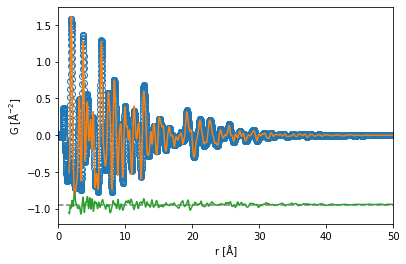

In [72]:
model.plot()

In [73]:
model.update()
model.save_all("results2", "JBNP32")

## Fit JBNP32L

In [8]:
model = create_model_with_ligand()
model.set_profile(data_set[1])
model.load("results2/JBNP32.txt")
model.set_xrange(1.6, 50., 0.1)

Start fit with all parameters fixed.
Round 1 / 2: Free A_scale, B_scale, L_amplitude ...
`gtol` termination condition is satisfied.
Function evaluations 6, initial cost 3.4410e+00, final cost 2.1765e-01, first-order optimality 5.50e-07.
Round 2 / 2: Free L_phi, L_sigma, L_wavelength ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 2.1765e-01, final cost 1.6529e-01, first-order optimality 1.15e-04.
Optimization result: Rw = 0.197345.


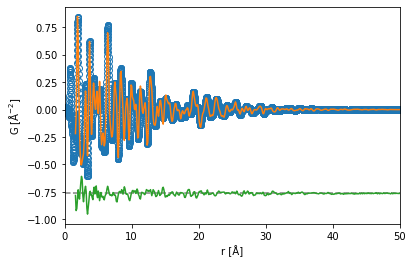

In [11]:
model.set_order(*L_order)
model.optimize()
model.plot()

Start fit with all parameters fixed.
Round 1 / 5: Free A_scale, B_scale ...
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 1.6529e-01, final cost 1.6529e-01, first-order optimality 3.34e-06.
Round 2 / 5: Free B_f_psize, B_f_psig ...
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 1.6529e-01, final cost 1.6237e-01, first-order optimality 3.40e-05.
Round 3 / 5: Free B_lat ...
`ftol` termination condition is satisfied.
Function evaluations 5, initial cost 1.6237e-01, final cost 1.4699e-01, first-order optimality 4.02e-04.
Round 4 / 5: Free B_adp, B_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 1.4699e-01, final cost 1.4068e-01, first-order optimality 1.71e-03.
Round 5 / 5: Free B_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 21, initial cost 1.4068e-01, final cost 1.2561e-01, first-order optimality 4.10e-02.
Optimization result: Rw = 0.171389.


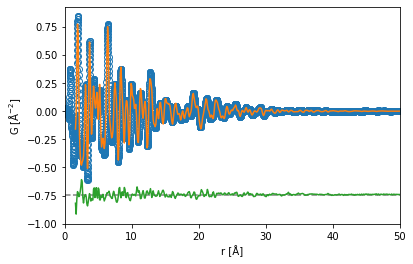

In [12]:
model.set_order(*B_order)
model.optimize()
model.plot()

Start fit with all parameters fixed.
Round 1 / 4: Free B_scale, A_scale, A_f_psize ...
`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 1.2561e-01, final cost 1.2460e-01, first-order optimality 1.94e-04.
Round 2 / 4: Free A_lat ...
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 1.2460e-01, final cost 1.2380e-01, first-order optimality 5.40e-04.
Round 3 / 4: Free A_adp, A_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 1.2380e-01, final cost 1.2286e-01, first-order optimality 3.48e-04.
Round 4 / 4: Free A_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 1.2286e-01, final cost 1.1788e-01, first-order optimality 3.11e-03.
Optimization result: Rw = 0.165760.


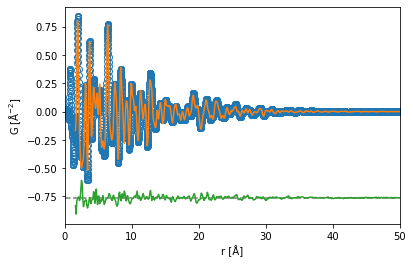

In [13]:
model.set_order(*A_order)
model.optimize()
model.plot()

Start fit with all parameters fixed.
Round 1 / 11: Free A_scale, B_scale ...
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.1788e-01, final cost 1.1788e-01, first-order optimality 1.01e-10.
Round 2 / 11: Free B_f_psize, B_f_psig ...
`gtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.1788e-01, final cost 1.1777e-01, first-order optimality 1.19e-06.
Round 3 / 11: Free B_lat ...
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 4, initial cost 1.1777e-01, final cost 1.1743e-01, first-order optimality 8.95e-04.
Round 4 / 11: Free B_adp, B_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 1.1743e-01, final cost 1.1297e-01, first-order optimality 2.47e-03.
Round 5 / 11: Free B_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 1.1297e-01, final cost 1.0884e-01, first-order optimality 2.26e-02.
Round 6 / 11: Free B_sca

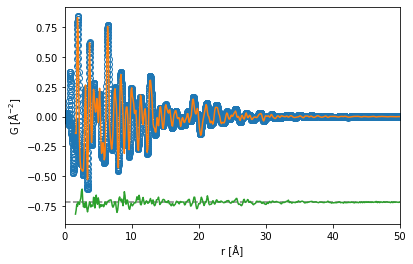

In [15]:
model.set_order(*B_order, *A_order, *L_order)
model.optimize()
model.plot()

Start fit with all parameters fixed.
Round 1 / 11: Free A_scale, B_scale ...
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 9.6943e-01, final cost 9.6941e-01, first-order optimality 9.14e-09.
Round 2 / 11: Free B_f_psize, B_f_psig ...
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 9.6941e-01, final cost 9.6938e-01, first-order optimality 4.15e-05.
Round 3 / 11: Free B_lat ...
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 9.6938e-01, final cost 9.6936e-01, first-order optimality 3.35e-03.
Round 4 / 11: Free B_adp, B_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 9.6936e-01, final cost 9.6497e-01, first-order optimality 2.41e-02.
Round 5 / 11: Free B_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 4, initial cost 9.6497e-01, final cost 9.6433e-01, first-order optimality 1.20e-01.
Round 6 / 11: Free B_scale, A_scale, A_f_ps

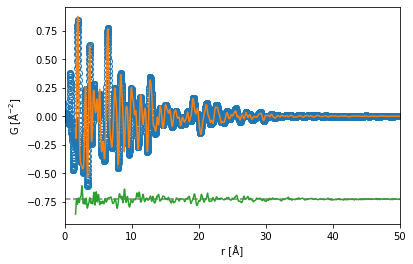

In [16]:
model.set_xrange(1.6, 50., 0.01)
model.set_order(*B_order, *A_order, *L_order)
model.optimize()
model.plot()

## Fit JBNP31

In [171]:
model = create_model_no_ligand()
model.set_profile(data_set[0])

In [180]:
model.set_xrange(1.6, 50., 0.01)
model.set_order("all")
model.optimize()

Start fit with all parameters fixed.
Round 1 / 1: Free all ...
`ftol` termination condition is satisfied.
Function evaluations 6, initial cost 3.0601e+00, final cost 3.0595e+00, first-order optimality 1.86e-01.
Optimization result: Rw = 0.120442.


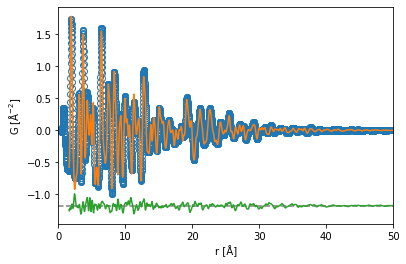

In [181]:
model.plot()

In [182]:
model.update()
model.save_all("results2", "JBNP31")

## Fit JBNP33

In [9]:
model = create_model_no_ligand()
model.set_profile(data_set[4])

In [197]:
model.set_xrange(1.6, 50., 0.01)

In [199]:
model.set_order(*B_order, *A_order, "all")
model.optimize()

Start fit with all parameters fixed.
Round 1 / 10: Free A_scale, B_scale ...
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 2.5614e+01, final cost 2.5523e+01, first-order optimality 1.29e-08.
Round 2 / 10: Free B_f_psize, B_f_psig ...
`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 2.5523e+01, final cost 9.5516e+00, first-order optimality 2.06e-04.
Round 3 / 10: Free B_lat ...
`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 9.5516e+00, final cost 8.6505e+00, first-order optimality 1.73e-01.
Round 4 / 10: Free B_adp, B_delta2 ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 8.6505e+00, final cost 7.1655e+00, first-order optimality 2.65e-01.
Round 5 / 10: Free B_xyz ...
`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 7.1655e+00, final cost 3.6785e+00, first-order optimality 4.26e-01.
Round 6 / 10: Free B_scale, A_scale, A_f

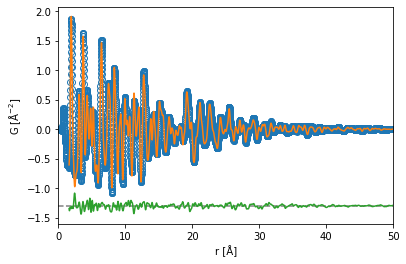

In [200]:
model.plot()

In [201]:
model.update()
model.save_all("results2", "JBNP33")

## Fit JBNP33L

In [6]:
model = create_model_with_ligand()
model.set_profile(data_set[3])

In [213]:
model.set_xrange(1.6, 50., 0.01)
model.set_order("all")
model.optimize()

Start fit with all parameters fixed.
Round 1 / 11: Free A_scale, B_scale, L_amplitude ...
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 1.9090e+00, final cost 1.9090e+00, first-order optimality 8.65e-07.
Round 2 / 11: Free L_phi, L_sigma, L_wavelength ...
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.9090e+00, final cost 1.9090e+00, first-order optimality 2.30e-07.
Round 3 / 11: Free B_scale, A_scale, A_f_psize ...
`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 1.9090e+00, final cost 1.9090e+00, first-order optimality 9.95e-06.
Round 4 / 11: Free A_lat ...
`gtol` termination condition is satisfied.
Function evaluations 2, initial cost 1.9090e+00, final cost 1.9090e+00, first-order optimality 4.40e-07.
Round 5 / 11: Free A_adp, A_delta2 ...
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 2, initial cost 1.9090e+00, final cost 1.9090e+00, first-order op

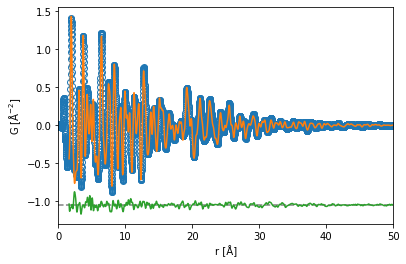

In [214]:
model.plot()

In [215]:
model.update()
model.save_all("results2", "JBNP33L")

## Output the results

In [17]:
params = load_and_concat("./results2/", "JBNP*_result.nc")
params = get_fraction_and_add_units(params)
params.to_netcdf("results2/parameters.nc")

In [6]:
fits = load_and_concat("./results2/", "JBNP*_fits.nc")
fits.to_netcdf("results2/fits.nc")